In [6]:
import numpy as np
import statsmodels.api as sm
import time

In [7]:
sizes = np.arange(10, 201, 10)
reps = 10000

In [8]:
def sim_r_squared(n):
    x = np.random.normal(size=n)
    y = 1 + x + np.random.normal(size=n)
    model = sm.OLS(y, sm.add_constant(x)).fit()
    return model.rsquared

In [9]:
r_squared_q95 = np.zeros(len(sizes))
r_squared_q5 = np.zeros(len(sizes))
r_squared_mean = np.zeros(len(sizes))

In [10]:
start_time = time.time()
for i in range(len(sizes)):
    result = np.array([sim_r_squared(sizes[i]) for j in range(reps)])
    r_squared_mean[i] = np.mean(result)
    r_squared_q5[i] = np.quantile(result, 0.05)
    r_squared_q95[i] = np.quantile(result, 0.95)
    end_time = time.time()

ValueError: x and y must have same first dimension, but have shapes (5,) and (20,)

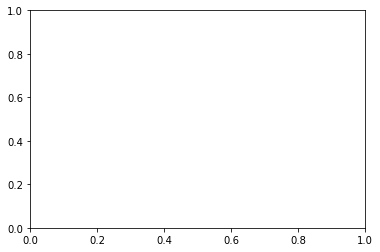

In [25]:
import matplotlib.pyplot as plt
plt.plot(sizes, r_squared_mean)
plt.fill_between(sizes, r_squared_q5, r_squared_q95, alpha=0.2)
plt.xlabel('Sample size')
plt.ylabel(r'$R^2$')
plt.ylim([np.min(r_squared_q5), np.max(r_squared_q95)])
plt.show()

# Part2

In [17]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [19]:
sizes = np.arange(10, 60, 10)
reps = 10000

In [20]:
def sim_r_squared_k(n, k, reps):
    x, y, result = np.ones((n, k+1)), np.zeros(n), []
    for _ in range(reps):
        x[:, 1:k+1] = np.random.randn(n, k)
        y += x.sum(axis=1) + np.random.randn(n)
        model = LinearRegression().fit(x, y)
        result.append(model.score(x, y))
    return result

In [21]:
def run(k, reps=10000, maxn=200):
    sizes = range(10, maxn+1, 10)
    r_squared_q95, r_squared_q5, r_squared_mean = [], [], []

    for s in sizes:
        print(s)
        result = sim_r_squared_k(s, k, reps)
        r_squared_mean.append(np.mean(result))
        r_squared_q5.append(np.quantile(result, 0.05))
        r_squared_q95.append(np.quantile(result, 0.95))
    plt.scatter(sizes, r_squared_mean)
    plt.plot(sizes, r_squared_q5, color="black")
    plt.plot(sizes, r_squared_q95, color="black")
    plt.xlabel("sample size")
    plt.ylabel("R²")
    plt.show()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200


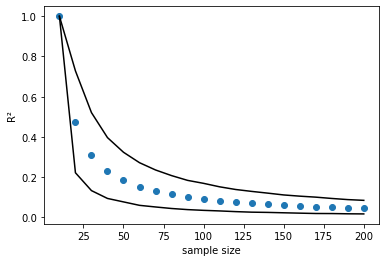

In [22]:
run(9)